## How to Check if a Time Series is Stationary

In [26]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import yfinance as yf

### Visual Inspection

A simple plot can give you a sense of whether the series has a constant mean and variance. If the series shows clear upward or downward trends or significant changes in variance over time, it is likely non-stationary.

[*********************100%***********************]  1 of 1 completed


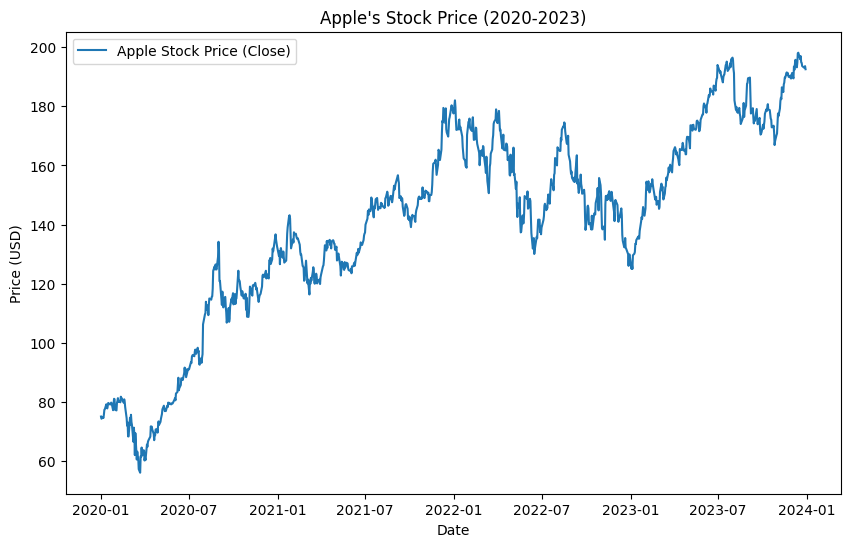

In [3]:
# Gather stock prices
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"

# Fetch the stock data
apple_data = yf.download(ticker, start=start_date, end=end_date)

# We will use the 'Close' price for analysis
apple_data = apple_data[['Close']]

# Step 4: Visualize the original time series
plt.figure(figsize=(10, 6))
plt.plot(apple_data['Close'], label='Apple Stock Price (Close)')
plt.title("Apple's Stock Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

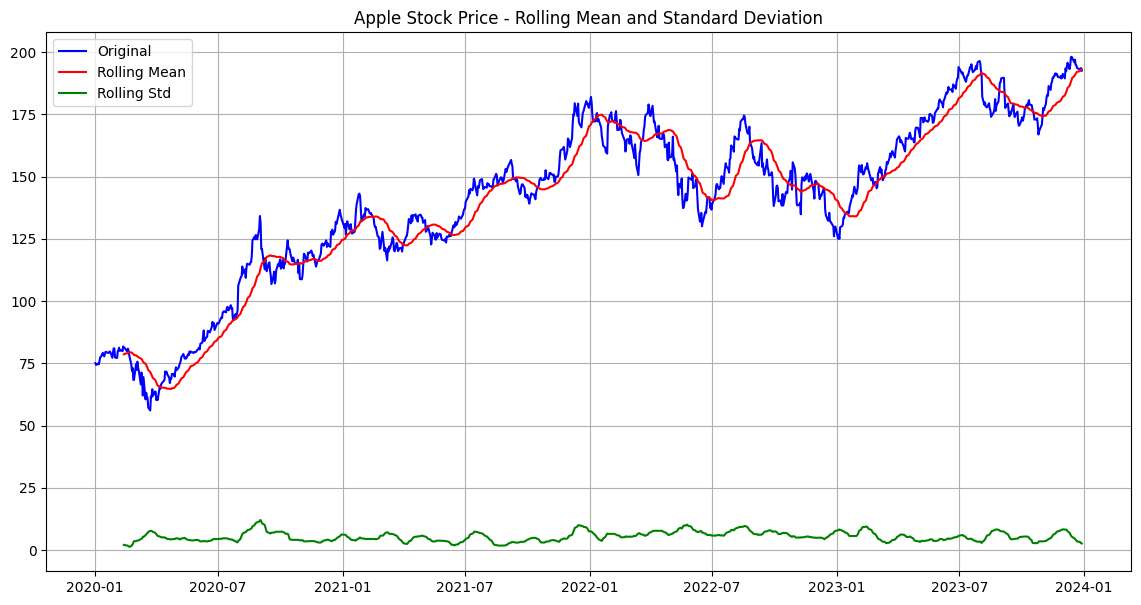

In [4]:
# Calculate rolling mean and standard deviation
rolling_mean = apple_data['Close'].rolling(window=30).mean()
rolling_std = apple_data['Close'].rolling(window=30).std()

# Plot original series and rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(apple_data['Close'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Apple Stock Price - Rolling Mean and Standard Deviation')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### ADF Test

The ADF Test is a widely used statistical test to determine whether a time series is stationary. It tests the null hypothesis that the time series is non-stationary.

In [6]:
# Perform ADF test
adf_result = adfuller(apple_data['Close'])

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.555344
p-value: 0.505978
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


### KPSS Test
The KPSS Test is another test that checks for stationarity but with the opposite null hypothesis: it tests whether a time series is stationary. A small p-value here suggests non-stationarity.

In [8]:
# Perform KPSS test
kpss_result = kpss(apple_data['Close'], regression='c')

print('KPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 3.875310
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\jacob\AppData\Local\Temp\ipykernel_16072\398859087.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(apple_data['Close'], regression='c')


## Making a Time Series Stationary

### Differencing
This technique involves subtracting the current observation from the previous one to remove trends or seasonality.

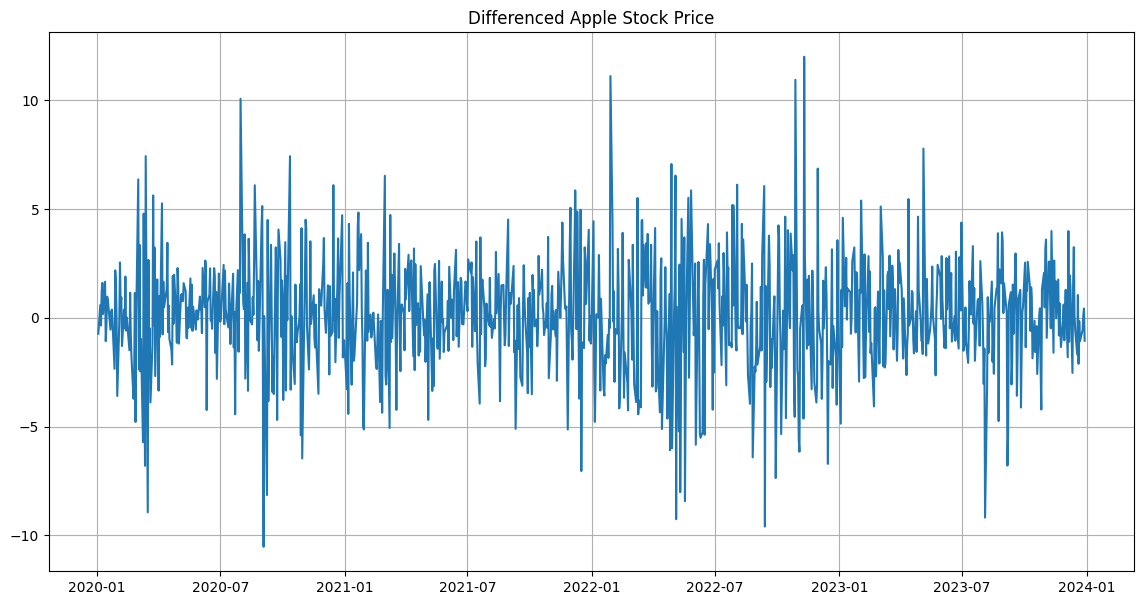

In [9]:
# Differencing the series
apple_data_diff = apple_data['Close'].diff().dropna()

# Plot differenced series
plt.figure(figsize=(14, 7))
plt.plot(apple_data_diff, label='Differenced Series')
plt.title('Differenced Apple Stock Price')
plt.grid(True)
plt.show()


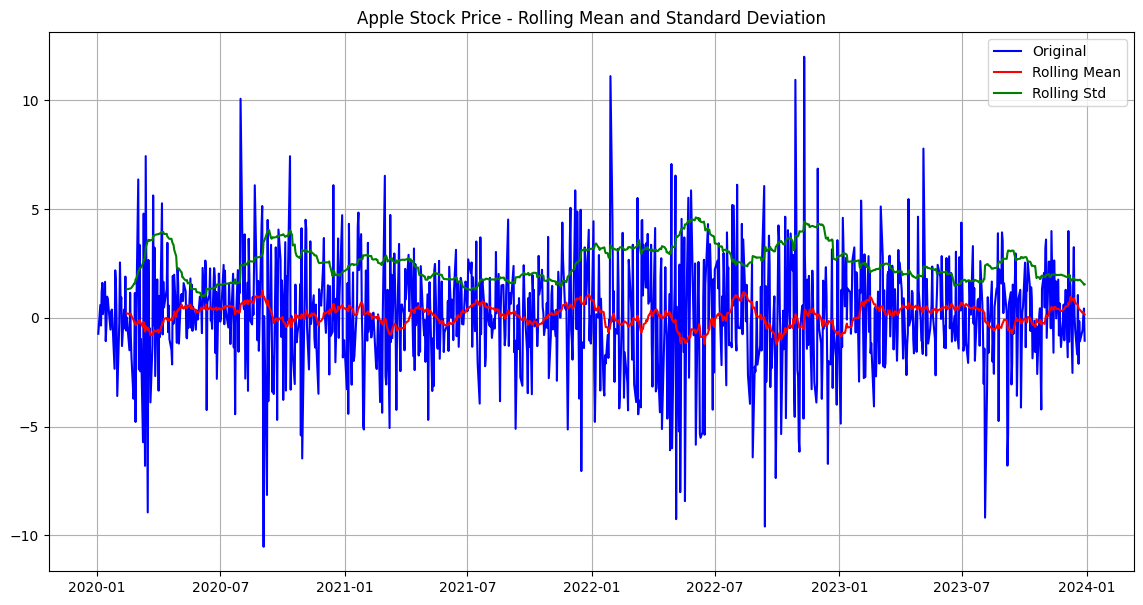

In [10]:
# Calculate rolling mean and standard deviation
rolling_mean = apple_data_diff.rolling(window=30).mean()
rolling_std = apple_data_diff.rolling(window=30).std()

# Plot original series and rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(apple_data_diff, label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Apple Stock Price - Rolling Mean and Standard Deviation')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [11]:
# Perform ADF test
adf_result = adfuller(apple_data_diff)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -33.004757
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


### Log Transformation
Log transformations can stabilize the variance and make the series more stationary.

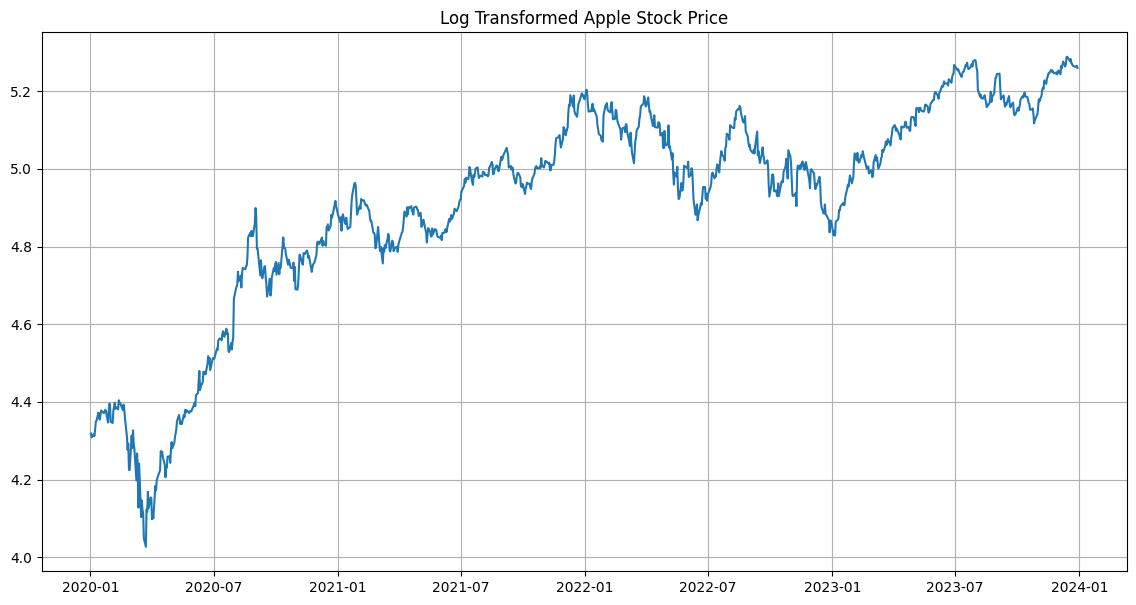

In [13]:
# Log transform the data
apple_data_log = np.log(apple_data['Close'])

# Plot the log-transformed series
plt.figure(figsize=(14, 7))
plt.plot(apple_data_log, label='Log Transformed Series')
plt.title('Log Transformed Apple Stock Price')
plt.grid(True)
plt.show()


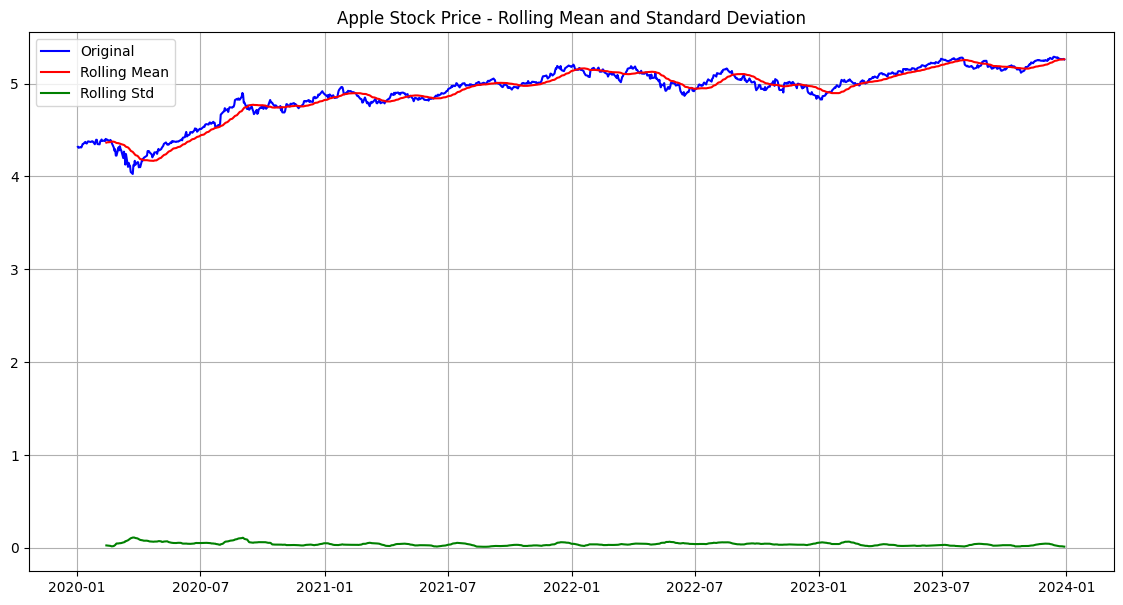

In [14]:
# Calculate rolling mean and standard deviation
rolling_mean = apple_data_log.rolling(window=30).mean()
rolling_std = apple_data_log.rolling(window=30).std()

# Plot original series and rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(apple_data_log, label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Apple Stock Price - Rolling Mean and Standard Deviation')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [15]:
# Perform ADF test
adf_result = adfuller(apple_data_log)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.742730
p-value: 0.409242
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


### Detrending


**Subtracting the Trend (From Decomposition)**

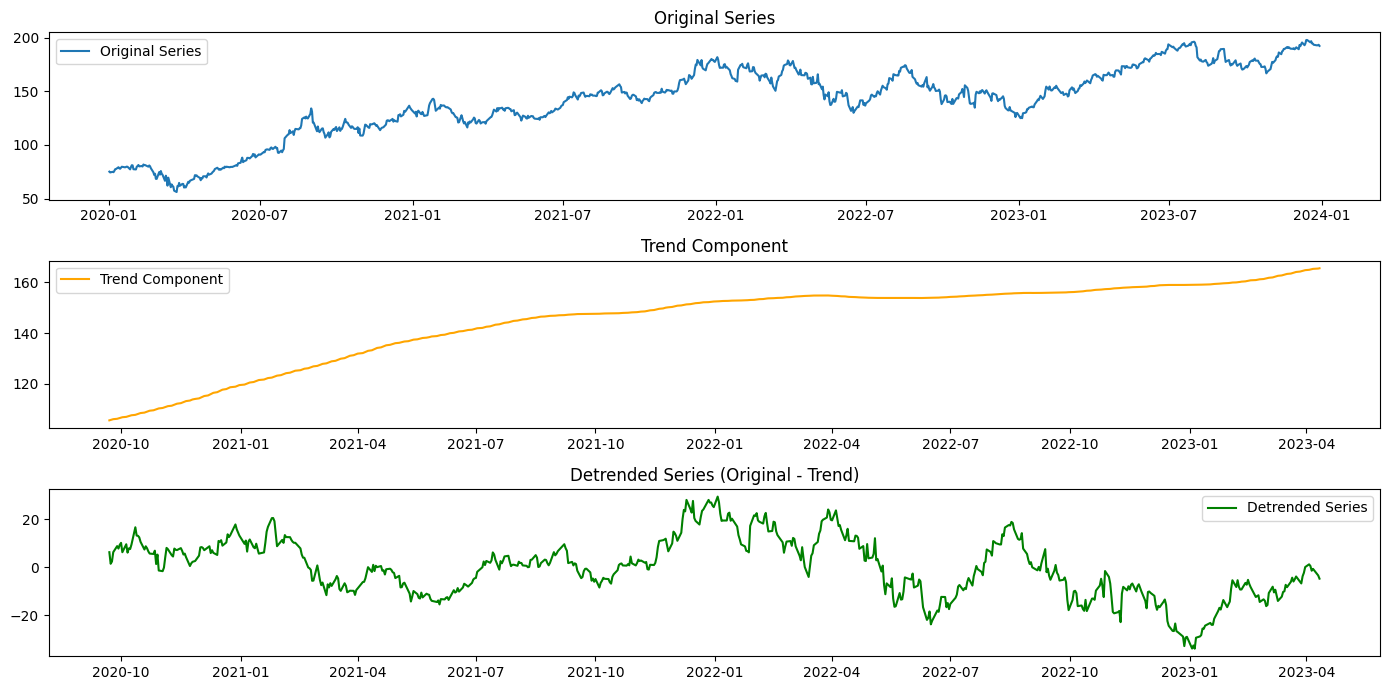

In [17]:
# Decompose the time series using additive model
decomposition = seasonal_decompose(apple_data['Close'], model='additive', period=365)

# Extract the trend component
trend = decomposition.trend

# Subtract the trend component from the original series
detrended_series = apple_data['Close'] - trend

# Plot the original series, trend, and detrended series
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(apple_data['Close'], label='Original Series')
plt.title('Original Series')
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(detrended_series, label='Detrended Series', color='green')
plt.title('Detrended Series (Original - Trend)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [18]:
# Remove NaN values from the detrended series
detrended_series_clean = detrended_series.dropna()

In [19]:
# Perform ADF test
adf_result = adfuller(detrended_series_clean)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.922507
p-value: 0.042793
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


**Fitting and Removing a Linear Trend**

If the trend is linear, you can fit a linear regression model to the time series and subtract the fitted values (the trend) from the original data. This removes the linear component of the series.

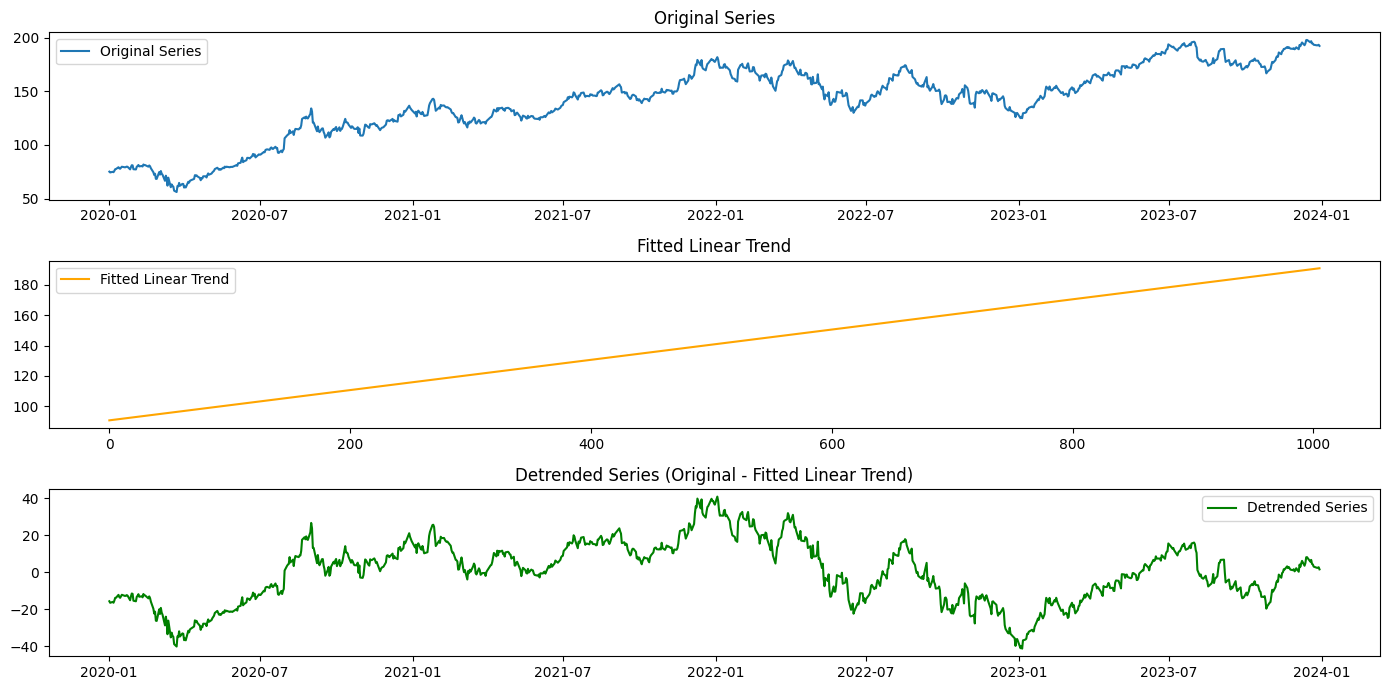

In [21]:
# Prepare the data: create a time index
time = np.arange(len(apple_data['Close'])).reshape(-1, 1)

# Fit a linear regression to the time series
model = LinearRegression()
model.fit(time, apple_data['Close'])

# Get the fitted trend values
trend = model.predict(time)

# Subtract the trend from the original series to get the detrended series
detrended_series = apple_data['Close'] - trend

# Plot the original series, fitted trend, and detrended series
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(apple_data['Close'], label='Original Series')
plt.title('Original Series')
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(trend, label='Fitted Linear Trend', color='orange')
plt.title('Fitted Linear Trend')
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(detrended_series, label='Detrended Series', color='green')
plt.title('Detrended Series (Original - Fitted Linear Trend)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [22]:
# Perform ADF test
adf_result = adfuller(detrended_series)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.641670
p-value: 0.084687
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


**Polynomial and Higher-Order Trends**

If the trend is non-linear (e.g., exponential or polynomial), fitting a higher-order polynomial (like quadratic or cubic) might be necessary.

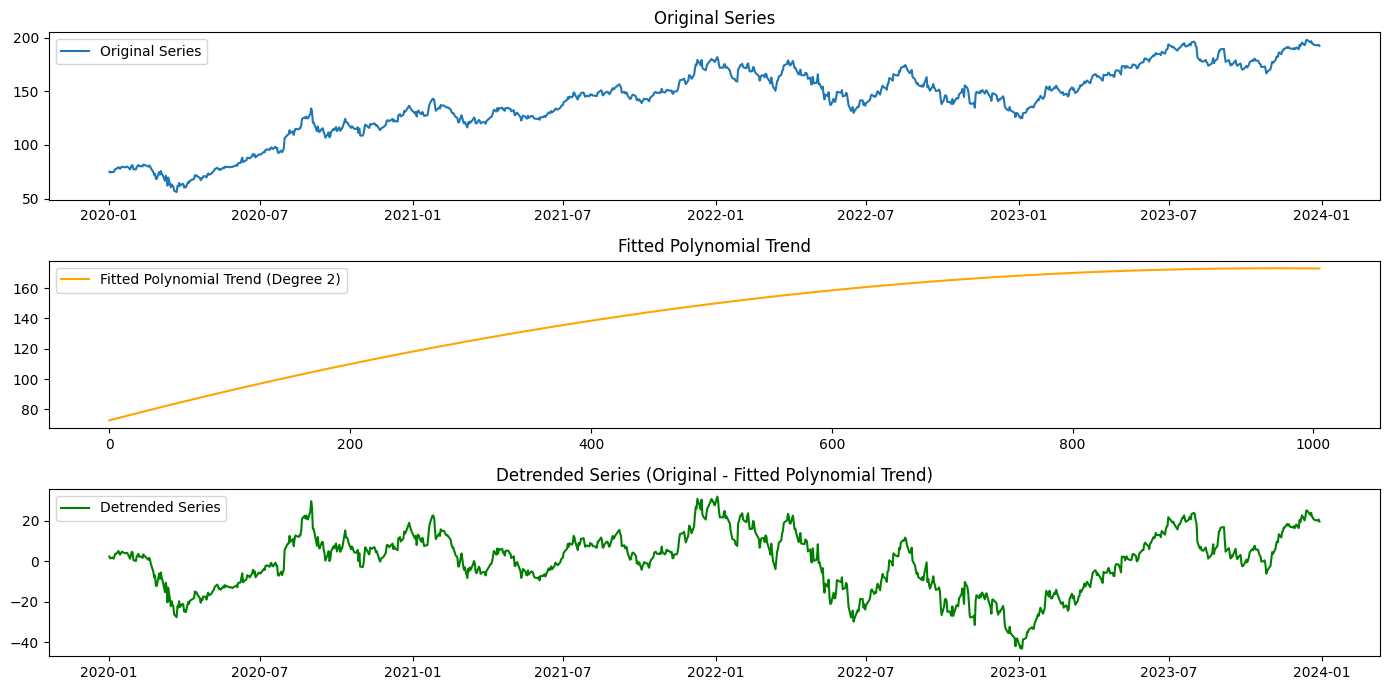

In [24]:
# Fit a polynomial (e.g., degree 2 for a quadratic trend)
time = np.arange(len(apple_data['Close']))
poly = Polynomial.fit(time, apple_data['Close'], deg=2)

# Get the fitted polynomial values
trend_poly = poly(time)

# Subtract the polynomial trend from the original series
detrended_poly_series = apple_data['Close'] - trend_poly

# Plot the original series, fitted polynomial trend, and detrended series
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(apple_data['Close'], label='Original Series')
plt.title('Original Series')
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(trend_poly, label='Fitted Polynomial Trend (Degree 2)', color='orange')
plt.title('Fitted Polynomial Trend')
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(detrended_poly_series, label='Detrended Series', color='green')
plt.title('Detrended Series (Original - Fitted Polynomial Trend)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [25]:
# Perform ADF test
adf_result = adfuller(detrended_poly_series)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.775224
p-value: 0.061901
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
